In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/tellco_data.csv')

In [3]:
df.drop_duplicates()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,end_date,end_time,youtube_total_data_vol,google_total_data_vol,email_total_data_vol,netflix_total_data_vol,gaming_total_data_vol,other_total_data_vol,social_media_total_data_vol,all_total_data_vol
0,1.311448e+19,2019-04-04 12:01:00,770.0000,2019-04-25 14:35:00,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2019-04-25,14:35:00,1.835594e+07,2.905912e+06,3.701304e+06,1.785519e+07,2.924265e+08,1.805588e+08,1.570185e+06,3.456294e+08
1,1.311448e+19,2019-04-09 13:04:00,235.0000,2019-04-25 08:15:00,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2019-04-25,08:15:00,3.935912e+07,4.414096e+06,9.373850e+05,3.556554e+07,6.099208e+08,5.419594e+08,1.933278e+06,7.071854e+08
2,1.311448e+19,2019-04-09 17:42:00,1.0000,2019-04-25 11:58:00,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,2019-04-25,11:58:00,3.442524e+07,1.022912e+07,3.363124e+06,2.375120e+07,2.299803e+08,4.149084e+08,1.726277e+06,3.076910e+08
3,1.311448e+19,2019-04-10 00:31:00,486.0000,2019-04-25 07:36:00,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2019-04-25,07:36:00,3.653476e+07,1.181176e+07,2.070983e+06,1.509259e+07,8.103879e+08,7.618372e+08,6.574930e+05,8.893527e+08
4,1.311448e+19,2019-04-12 20:10:00,565.0000,2019-04-25 10:40:00,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,2019-04-25,10:40:00,3.422225e+07,7.748843e+06,2.110349e+06,1.753980e+07,5.312370e+08,5.646198e+08,9.127880e+05,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0000,2019-04-30 06:02:00,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,2019-04-30,06:02:00,2.795510e+07,1.278491e+07,6.908760e+05,3.756186e+07,5.358069e+08,1.675193e+07,3.517065e+06,6.318041e+08
149997,7.349883e+18,2019-04-29 07:28:00,483.0000,2019-04-30 10:41:00,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2019-04-30,10:41:00,2.216552e+07,4.415361e+06,2.121718e+06,4.064329e+07,6.316281e+08,7.146381e+08,2.352181e+06,7.057839e+08
149998,1.311448e+19,2019-04-29 07:28:00,283.0000,2019-04-30 10:46:00,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2019-04-30,10:46:00,2.451641e+07,6.585469e+06,2.058277e+06,1.502970e+07,5.669338e+08,1.324156e+08,1.260239e+06,6.276986e+08
149999,1.311448e+19,2019-04-29 07:28:00,696.0000,2019-04-30 10:40:00,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,2019-04-30,10:40:00,1.712251e+07,7.757267e+06,2.850914e+06,1.649484e+07,3.550664e+08,8.161200e+08,8.231090e+05,4.015220e+08


### Tracking users' engagement

#### metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))


In [4]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

In [5]:
df['total_data(megabytes)'] = convert_bytes_to_megabytes(df, 'all_total_data_vol')

#### calculate each metric

In [6]:
# aggregate columns
aggs_col = {'Bearer Id':'count', 'Dur. (ms)':'sum','total_data(megabytes)':'sum'}

df = df.groupby('MSISDN/Number').agg(aggs_col)
df

,Bearer Id,Dur. (ms),total_data(megabytes)
MSISDN/Number,,,
3.360100e+10,1,116720.0,878.690574
3.360100e+10,1,181230.0,156.859643
3.360100e+10,1,134969.0,595.966483
3.360101e+10,1,49878.0,422.320698
3.360101e+10,2,37104.0,1457.410944
...,...,...,...
3.379000e+10,1,8810.0,714.641641
3.379000e+10,1,140988.0,480.307335
3.197021e+12,1,877385.0,232.123971


### Top 10 customers per engagement metric

In [7]:
# sessions frequency
df = df.sort_values('Bearer Id', ascending=False).iloc[:10, :]
pd.DataFrame(df.loc[:, 'Bearer Id'])

,Bearer Id
MSISDN/Number,
3.366371e+10,1067
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360452e+10,12


In [8]:
# duratioon of the session
df = df.sort_values('Dur. (ms)', ascending=False).iloc[:10, :]
pd.DataFrame(df.loc[:, 'Dur. (ms)'])

,Dur. (ms)
MSISDN/Number,
3.366371e+10,7.267378e+07
3.362578e+10,1.855375e+07
3.361489e+10,9.966898e+06
3.376054e+10,9.279434e+06
3.362632e+10,8.791927e+06
3.366716e+10,8.744914e+06
3.376041e+10,5.321667e+06
3.360452e+10,5.207990e+06
3.367588e+10,4.865947e+06


In [9]:
# session total traffic
df = df.sort_values('total_data(megabytes)', ascending=False).iloc[:10, :]
pd.DataFrame(df.loc[:, 'total_data(megabytes)'])

,total_data(megabytes)
MSISDN/Number,
3.366371e+10,531962.337763
3.361489e+10,8846.226494
3.376054e+10,8514.773963
3.362578e+10,8499.620722
3.362632e+10,7971.167261
3.367588e+10,7891.110608
3.365973e+10,7705.862783
3.376041e+10,7132.370514
3.366716e+10,5618.394054


### Normalizing each metric

In [10]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
standardizer = StandardScaler().fit_transform(df)

In [11]:
df

,Bearer Id,Dur. (ms),total_data(megabytes)
MSISDN/Number,,,
3.366371e+10,1067,7.267378e+07,531962.337763
3.361489e+10,17,9.966898e+06,8846.226494
3.376054e+10,15,9.279434e+06,8514.773963
3.362578e+10,17,1.855375e+07,8499.620722
3.362632e+10,18,8.791927e+06,7971.167261
3.367588e+10,15,4.865947e+06,7891.110608
3.365973e+10,16,4.035428e+06,7705.862783
3.376041e+10,12,5.321667e+06,7132.370514
3.366716e+10,13,8.744914e+06,5618.394054


### k-means (k=3) to classify customers in three groups of engagement. 

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Centroids of the clustering:
	[[1.37500000e+01 4.85775800e+06 7.05429980e+03]
 [1.06700000e+03 7.26737776e+07 5.31962338e+05]
 [1.60000000e+01 1.10673854e+07 7.89003650e+03]]
# The number of iterations required to converge: 72039320005850.73
# The number of iterations required to converge: 4


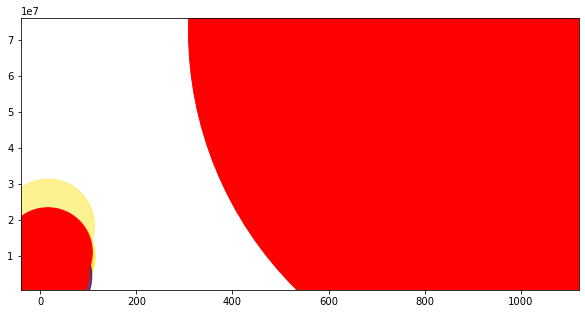

In [18]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42).fit(df)
centroids = kmeans.cluster_centers_

print(f'# Centroids of the clustering:\n\t{centroids}')
print(f'# The number of iterations required to converge: {kmeans.inertia_}')
print(f'# The number of iterations required to converge: {kmeans.n_iter_}')

plt.figure(figsize=(10,5))
plt.scatter(df['Bearer Id'], df['Dur. (ms)'], df['total_data(megabytes)'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], c='red')
plt.show()

### Compute the minimum, maximum, average & total non- normalized metrics for each cluster.

### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [ ]:
def get_top_sorted_by_column(self, column: str, length: int) -> pd.DataFrame:
        try:
            pre_df = self.df.sort_values(
                column, ascending=False).iloc[:length, :]
            return pd.DataFrame(pre_df.loc[:, column])